# Prism Data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
consdf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-consDF.pqt')
consdf.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET
0,0,2021-09-01,726.0,0.0
1,1,2021-07-01,626.0,0.0
2,2,2021-05-01,680.0,0.0
3,3,2021-03-01,734.0,0.0
4,4,2021-10-01,676.0,0.0


In [3]:
acctdf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-acctDF.pqt')
acctdf

,prism_consumer_id,prism_account_id,account_type,balance_date,balance
0,3023,0,SAVINGS,2021-08-31,90.57
1,3023,1,CHECKING,2021-08-31,225.95
2,4416,2,SAVINGS,2022-03-31,15157.17
3,4416,3,CHECKING,2022-03-31,66.42
4,4227,4,CHECKING,2021-07-31,7042.90
...,...,...,...,...,...
24461,11500,24461,CHECKING,2022-03-27,732.75
24462,11615,24462,SAVINGS,2022-03-30,5.00
24463,11615,24463,CHECKING,2022-03-30,1956.46
24464,12210,24464,CHECKING,2022-03-28,2701.51


In [4]:
trxndf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-trxnDF.pqt')
trxndf

,prism_consumer_id,prism_transaction_id,category,amount,credit_or_debit,posted_date
0,3023,0,4,0.05,CREDIT,2021-04-16
1,3023,1,12,481.56,CREDIT,2021-04-30
2,3023,2,4,0.05,CREDIT,2021-05-16
3,3023,3,4,0.07,CREDIT,2021-06-16
4,3023,4,4,0.06,CREDIT,2021-07-16
...,...,...,...,...,...,...
6407316,10533,6405304,31,4.96,DEBIT,2022-03-11
6407317,10533,6405305,12,63.48,DEBIT,2022-03-30
6407318,10533,6405306,12,53.99,DEBIT,2022-03-30
6407319,10533,6405307,12,175.98,DEBIT,2022-03-31


In [5]:
cats = pd.read_csv('/uss/hdsi-prismdata/q2-ucsd-cat-map.csv')
cats

,category_id,category
0,0,SELF_TRANSFER
1,1,EXTERNAL_TRANSFER
2,2,DEPOSIT
3,3,PAYCHECK
4,4,MISCELLANEOUS
5,5,PAYCHECK_PLACEHOLDER
6,6,REFUND
7,7,INVESTMENT_INCOME
8,8,OTHER_BENEFITS
9,9,UNEMPLOYMENT_BENEFITS


In [6]:
# columns I will need: credit/debit, amount, posted date, evaluation date, prism consumer id, DQ_TARGET
merged = pd.merge(consdf, trxndf, on='prism_consumer_id', how='left')
merged.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,prism_transaction_id,category,amount,credit_or_debit,posted_date
0,0,2021-09-01,726.0,0.0,136696,4.0,0.09,CREDIT,2021-03-19
1,0,2021-09-01,726.0,0.0,136697,4.0,0.05,CREDIT,2021-04-16
2,0,2021-09-01,726.0,0.0,136698,4.0,0.06,CREDIT,2021-05-21
3,0,2021-09-01,726.0,0.0,136699,4.0,0.04,CREDIT,2021-06-18
4,0,2021-09-01,726.0,0.0,136700,4.0,0.02,CREDIT,2021-07-16


In [7]:
merged = merged[merged['posted_date'] <= merged['evaluation_date']]
credit_only = merged[merged['credit_or_debit'] == 'CREDIT'].copy()
credit_only['posted_date'] = pd.to_datetime(credit_only['posted_date'])
credit_only['Year-Month'] = credit_only['posted_date'].dt.to_period('M')
credit_only

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,prism_transaction_id,category,amount,credit_or_debit,posted_date,Year-Month
0,0,2021-09-01,726.0,0.0,136696,4.0,0.09,CREDIT,2021-03-19,2021-03
1,0,2021-09-01,726.0,0.0,136697,4.0,0.05,CREDIT,2021-04-16,2021-04
2,0,2021-09-01,726.0,0.0,136698,4.0,0.06,CREDIT,2021-05-21,2021-05
3,0,2021-09-01,726.0,0.0,136699,4.0,0.04,CREDIT,2021-06-18,2021-06
4,0,2021-09-01,726.0,0.0,136700,4.0,0.02,CREDIT,2021-07-16,2021-07
...,...,...,...,...,...,...,...,...,...,...
6407626,14999,2022-02-12,751.0,NaN,3843006,2.0,2000.00,CREDIT,2022-01-18,2022-01
6407627,14999,2022-02-12,751.0,NaN,3843007,45.0,860.29,CREDIT,2022-01-18,2022-01
6407628,14999,2022-02-12,751.0,NaN,3843008,3.0,589.73,CREDIT,2022-01-21,2022-01
6407629,14999,2022-02-12,751.0,NaN,3843009,3.0,589.70,CREDIT,2022-02-04,2022-02


In [8]:
debt_only = trxndf[trxndf['credit_or_debit']=='DEBIT']

In [9]:
monthly_inflow = credit_only.groupby(['prism_consumer_id', 'Year-Month'])['amount'].sum().reset_index(name='monthly_inflow')
monthly_inflow

,prism_consumer_id,Year-Month,monthly_inflow
0,0,2021-03,2400.69
1,0,2021-04,3210.66
2,0,2021-05,967.00
3,0,2021-06,1068.13
4,0,2021-07,2204.83
...,...,...,...
81677,9998,2023-10,5140.21
81678,9999,2023-05,7664.45
81679,9999,2023-06,12576.78
81680,9999,2023-07,10370.51


In [10]:
consdf['Evaluation Month'] = consdf['evaluation_date'].dt.to_period('M')
consdf

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month
0,0,2021-09-01,726.0,0.0,2021-09
1,1,2021-07-01,626.0,0.0,2021-07
2,2,2021-05-01,680.0,0.0,2021-05
3,3,2021-03-01,734.0,0.0,2021-03
4,4,2021-10-01,676.0,0.0,2021-10
...,...,...,...,...,...
14995,14995,2022-03-08,655.0,NaN,2022-03
14996,14996,2022-01-15,625.0,NaN,2022-01
14997,14997,2022-01-31,688.0,NaN,2022-01
14998,14998,2022-03-08,722.0,NaN,2022-03


In [11]:
with_eval_month = pd.merge(consdf, monthly_inflow, on='prism_consumer_id', how='left')
with_eval_month

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,Year-Month,monthly_inflow
0,0,2021-09-01,726.0,0.0,2021-09,2021-03,2400.69
1,0,2021-09-01,726.0,0.0,2021-09,2021-04,3210.66
2,0,2021-09-01,726.0,0.0,2021-09,2021-05,967.00
3,0,2021-09-01,726.0,0.0,2021-09,2021-06,1068.13
4,0,2021-09-01,726.0,0.0,2021-09,2021-07,2204.83
...,...,...,...,...,...,...,...
82997,14999,2022-02-12,751.0,NaN,2022-02,2021-10,1672.10
82998,14999,2022-02-12,751.0,NaN,2022-02,2021-11,1876.17
82999,14999,2022-02-12,751.0,NaN,2022-02,2021-12,2283.05
83000,14999,2022-02-12,751.0,NaN,2022-02,2022-01,4078.80


In [12]:
with_eval_month['months_diff'] = (
    (with_eval_month['Evaluation Month'].dt.year - with_eval_month['Year-Month'].dt.year) * 12 +
    (with_eval_month['Evaluation Month'].dt.month - with_eval_month['Year-Month'].dt.month)
)

with_eval_month

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,Year-Month,monthly_inflow,months_diff
0,0,2021-09-01,726.0,0.0,2021-09,2021-03,2400.69,6
1,0,2021-09-01,726.0,0.0,2021-09,2021-04,3210.66,5
2,0,2021-09-01,726.0,0.0,2021-09,2021-05,967.00,4
3,0,2021-09-01,726.0,0.0,2021-09,2021-06,1068.13,3
4,0,2021-09-01,726.0,0.0,2021-09,2021-07,2204.83,2
...,...,...,...,...,...,...,...,...
82997,14999,2022-02-12,751.0,NaN,2022-02,2021-10,1672.10,4
82998,14999,2022-02-12,751.0,NaN,2022-02,2021-11,1876.17,3
82999,14999,2022-02-12,751.0,NaN,2022-02,2021-12,2283.05,2
83000,14999,2022-02-12,751.0,NaN,2022-02,2022-01,4078.80,1


In [13]:
last_year = with_eval_month[(with_eval_month['months_diff'] >= 1) & (with_eval_month['months_diff'] <= 12)]
last_year

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,Year-Month,monthly_inflow,months_diff
0,0,2021-09-01,726.0,0.0,2021-09,2021-03,2400.69,6
1,0,2021-09-01,726.0,0.0,2021-09,2021-04,3210.66,5
2,0,2021-09-01,726.0,0.0,2021-09,2021-05,967.00,4
3,0,2021-09-01,726.0,0.0,2021-09,2021-06,1068.13,3
4,0,2021-09-01,726.0,0.0,2021-09,2021-07,2204.83,2
...,...,...,...,...,...,...,...,...
82996,14999,2022-02-12,751.0,NaN,2022-02,2021-09,1206.47,5
82997,14999,2022-02-12,751.0,NaN,2022-02,2021-10,1672.10,4
82998,14999,2022-02-12,751.0,NaN,2022-02,2021-11,1876.17,3
82999,14999,2022-02-12,751.0,NaN,2022-02,2021-12,2283.05,2


In [14]:
# average monthly inflow per consumer over the last 12 months
sum_yearly_inflow = last_year.groupby('prism_consumer_id')['monthly_inflow'].sum().reset_index(name='avg_yearly_inflow')
sum_yearly_inflow

,prism_consumer_id,avg_yearly_inflow
0,0,12616.52
1,1,22183.66
2,10,18250.62
3,10000,74291.49
4,10001,61026.34
...,...,...
13616,9995,16925.84
13617,9996,1000.03
13618,9997,12743.23
13619,9998,14566.37


In [15]:
# variability in income (higher variability = more likely to be delinquent)
year_std = last_year.groupby('prism_consumer_id')['monthly_inflow'].std().reset_index()
year_std.columns = ['prism_consumer_id', 'std_inflow']

In [16]:
# Trend: Is income increasing or decreasing?
def calculate_trend(group):
    if len(group) < 2:
        return 0
    months = group['months_diff'].values
    inflows = group['monthly_inflow'].values
    return np.polyfit(months, inflows, 1)[0]  # slope

trend = last_year.groupby('prism_consumer_id').apply(calculate_trend, include_groups=False).reset_index()
trend.columns = ['prism_consumer_id', 'trend']

In [17]:
# number of transactions
num_transactions = last_year.groupby('prism_consumer_id').size().reset_index()
num_transactions.columns = ['prism_consumer_id', 'num_transactions']

In [18]:
# new feature for week 3

debt_only = trxndf[trxndf['credit_or_debit'] == 'DEBIT'].copy()
debt_only['posted_date'] = pd.to_datetime(debt_only['posted_date'])

debt_with_category = pd.merge(debt_only, cats, left_on='category', right_on='category_id', how='left')[['prism_consumer_id',\
    'prism_transaction_id', 'amount', 'credit_or_debit', 'posted_date', 'category_id', 'category_y']]
debt_with_category = debt_with_category.rename(columns={'category_y':'category'})
groceries_only = debt_with_category[debt_with_category['category']=='GROCERIES']

debt_with_eval = pd.merge(groceries_only, consdf[['prism_consumer_id', 'evaluation_date']], on='prism_consumer_id', how='left')

# Filter for transactions in the 3 months before evaluation_date
debt_with_eval['months_before_eval'] = (
    (debt_with_eval['evaluation_date'].dt.year - debt_with_eval['posted_date'].dt.year) * 12 +
    (debt_with_eval['evaluation_date'].dt.month - debt_with_eval['posted_date'].dt.month)
)

debt_9m = debt_with_eval[(debt_with_eval['months_before_eval'] >= 0) & 
                          (debt_with_eval['months_before_eval'] < 9)]

# total spend of groceries per consumer over a 9 month window (last 9 months before eval date)
total_spend_groceries_9m = debt_9m.groupby('prism_consumer_id')['amount'].sum().reset_index()
total_spend_groceries_9m.columns = ['prism_consumer_id', 'sum_groceries_9m']
total_spend_groceries_9m

,prism_consumer_id,sum_groceries_9m
0,0,997.63
1,1,427.27
2,10,621.79
3,10000,3847.95
4,10001,683.59
...,...,...
11904,9994,2434.95
11905,9995,165.78
11906,9996,52.22
11907,9998,435.26


In [19]:
# total spend of dining per consumer over a month window (last month before eval date)
dining_only = debt_with_category[debt_with_category['category']=='FOOD_AND_BEVERAGES']

debt_with_eval_dining = pd.merge(dining_only, consdf[['prism_consumer_id', 'evaluation_date']], on='prism_consumer_id', how='left')

# Filter for transactions in the 6 months before evaluation_date
debt_with_eval_dining['months_before_eval'] = (
    (debt_with_eval_dining['evaluation_date'].dt.year - debt_with_eval_dining['posted_date'].dt.year) * 12 +
    (debt_with_eval_dining['evaluation_date'].dt.month - debt_with_eval_dining['posted_date'].dt.month)
)

debt_6m = debt_with_eval_dining[(debt_with_eval_dining['months_before_eval'] >= 0) & 
                          (debt_with_eval_dining['months_before_eval'] < 6)]

# total spend of groceries per consumer over a 6 month window (last 6 months before eval date)
total_spend_dining_6m = debt_6m.groupby('prism_consumer_id')['amount'].sum().reset_index()
total_spend_dining_6m.columns = ['prism_consumer_id', 'sum_dining_6m']
total_spend_dining_6m #702, 6

,prism_consumer_id,sum_dining_6m
0,0,3746.79
1,1,308.65
2,10,3010.31
3,10000,1563.55
4,10001,1864.00
...,...,...
12350,9995,387.16
12351,9996,107.83
12352,9997,66.41
12353,9998,300.74


In [20]:
debt_with_category['category_id'].sort_values(ascending=False).value_counts(normalize=True)[0:5]

category_id
14    0.168014
16    0.148883
4     0.096485
17    0.089494
1     0.089005
Name: proportion, dtype: float64

In [21]:
# merge evaluation date ONCE
tx = debt_with_category.merge(
    consdf[['prism_consumer_id', 'evaluation_date']],
    on='prism_consumer_id',
    how='left'
)

tx = tx[tx['credit_or_debit'] == 'DEBIT']
tx['amount'] = tx['amount'].abs()

# numerator
total_spend_gambling = tx[tx['category'] == 'GAMBLING'].groupby('prism_consumer_id')['amount'].sum()

# denominator
total_spend_all = tx.groupby('prism_consumer_id')['amount'].sum()

pct_spend_gambling = (total_spend_gambling / total_spend_all).fillna(0).reset_index(name='pct_spend_gambling')


In [22]:
essentials = ['RENT', 'MORTGAGE', 'BILLS_UTILITIES', 'ESSENTIAL_SERVICES', 'GROCERIES', 'AUTOMOTIVE', 'TRANSPORTATION', \
'HEALTHCARE_MEDICAL', 'INSURANCE', 'CHILD_DEPENDENTS', 'PETS', 'TAX', 'LOAN', 'AUTO_LOAN', 'DEBT', 'CREDIT_CARD_PAYMENT', \
'EDUCATION', 'LEGAL', 'GOVERNMENT_SERVICES']

total_spend_essentials = tx[tx['category'].isin(essentials)].groupby('prism_consumer_id')['amount'].sum()

pct_spend_essentials = (total_spend_essentials / total_spend_all).reset_index()

pct_spend_essentials = pct_spend_essentials.rename(columns={'amount':'pct_spend_essentials'})

In [23]:
# # change in groceries per consumer from the 3 most recent months to the prior 3-6 months before evaluation date
# lowers AUC from 0.721 to 0.71

# recent 3 months (0–2)
recent_3m = debt_with_eval[(debt_with_eval['months_before_eval'] >= 0) & (debt_with_eval['months_before_eval'] < 3)]

recent_spend = recent_3m.groupby('prism_consumer_id')['amount'].sum().reset_index(name='groceries_0_3m')

# prior 3 months (3–5)
prior_3m = debt_with_eval[(debt_with_eval['months_before_eval'] >= 3) & (debt_with_eval['months_before_eval'] < 6)]

prior_spend = prior_3m.groupby('prism_consumer_id')['amount'].sum().reset_index(name='groceries_3_6m')

# merge and compute delta
delta_groceries_3m = recent_spend.merge(
    prior_spend,
    on='prism_consumer_id',
    how='outer'
).fillna(0)

delta_groceries_3m['delta_groceries_3m'] = delta_groceries_3m['groceries_0_3m'] - delta_groceries_3m['groceries_3_6m']

delta_groceries_3m = delta_groceries_3m[['prism_consumer_id', 'delta_groceries_3m']]

delta_groceries_3m

,prism_consumer_id,delta_groceries_3m
0,0,77.40
1,1,133.79
2,10,-278.27
3,10000,-1780.54
4,10001,-228.73
...,...,...
11754,9994,2234.95
11755,9995,102.12
11756,9996,52.22
11757,9998,-14.74


In [24]:
utilities = ['BILLS_UTILITIES', 'ESSENTIAL_SERVICES']

total_spend_utilities = tx[tx['category'].isin(utilities)].groupby('prism_consumer_id')['amount'].sum()

pct_spend_utilities = (total_spend_utilities / total_spend_all).reset_index()

pct_spend_utilities = pct_spend_utilities.rename(columns={'amount':'pct_spend_utilities'})

In [64]:
# has overdraft - 6 months
# Merge evaluation dates with ALL debt transactions
debt_with_eval = pd.merge(
    debt_with_category, 
    consdf[['prism_consumer_id', 'evaluation_date']], 
    on='prism_consumer_id', 
    how='left'
)

# Calculate days before evaluation
debt_with_eval['days_before_eval'] = (
    debt_with_eval['evaluation_date'] - debt_with_eval['posted_date']
).dt.days

# Filter for OVERDRAFT category AND within 6 months
overdraft_6m = debt_with_eval[
    (debt_with_eval['category'] == 'OVERDRAFT') &
    (debt_with_eval['days_before_eval'] >= 0) & 
    (debt_with_eval['days_before_eval'] <= 182)
]

# Group to get consumers with overdrafts
has_overdraft_6m = overdraft_6m.groupby('prism_consumer_id').size().reset_index(name='overdraft_count')
has_overdraft_6m['has_overdraft_6m'] = 1

has_overdraft_6m = has_overdraft_6m[['prism_consumer_id', 'has_overdraft_6m']]

### Evaluating Model

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble._forest import RandomForestClassifier
import matplotlib.pyplot as plt

In [66]:
df_eval = pd.merge(consdf, sum_yearly_inflow, on='prism_consumer_id', how='inner')
df_eval = pd.merge(df_eval, year_std, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, trend, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, num_transactions, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, total_spend_groceries_9m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, total_spend_dining_6m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, pct_spend_gambling, on='prism_consumer_id',how='left')
df_eval = pd.merge(df_eval, pct_spend_essentials, on='prism_consumer_id',how='left')
df_eval = pd.merge(df_eval, delta_groceries_3m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, pct_spend_utilities, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, has_overdraft_6m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, has_overdraft_6m, on='prism_consumer_id', how='left')
df_eval['has_overdraft_6m'] = df_eval['has_overdraft_6m'].fillna(0).astype(int)
df_eval

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,has_overdraft_6m_x,avg_yearly_inflow,std_inflow,trend,num_transactions,sum_groceries_9m,sum_dining_6m,pct_spend_gambling,pct_spend_essentials,delta_groceries_3m,pct_spend_utilities,has_overdraft_6m_y,has_overdraft_6m
0,0,2021-09-01,726.0,0.0,2021-09,0,12616.52,908.391215,31.250286,6,997.63,3746.79,0.000000,0.137073,77.40,NaN,NaN,0
1,1,2021-07-01,626.0,0.0,2021-07,0,22183.66,1525.566140,-415.096571,6,427.27,308.65,0.000000,0.042884,133.79,NaN,NaN,0
2,2,2021-05-01,680.0,0.0,2021-05,0,22552.71,3171.402778,-463.708286,6,211.36,1227.12,0.000000,0.122470,-27.03,0.016566,NaN,0
3,3,2021-03-01,734.0,0.0,2021-03,0,19201.43,4228.545848,-1503.769429,6,106.84,491.80,0.000000,0.035553,-32.74,0.019946,NaN,0
4,4,2021-10-01,676.0,0.0,2021-10,0,11501.05,1397.342044,-498.965299,5,1125.82,143.52,0.028326,0.275164,-913.63,0.051891,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13616,14995,2022-03-08,655.0,NaN,2022-03,0,11637.81,1754.643462,-789.170000,6,NaN,1067.05,0.000000,0.397155,NaN,0.147064,NaN,0
13617,14996,2022-01-15,625.0,NaN,2022-01,0,60228.23,6788.642248,-1068.350833,8,240.65,810.54,0.000000,0.100411,-195.65,0.000902,NaN,0
13618,14997,2022-01-31,688.0,NaN,2022-01,0,41131.47,7925.862203,-2249.331786,7,69.81,326.02,0.001190,0.743218,37.13,NaN,NaN,0
13619,14998,2022-03-08,722.0,NaN,2022-03,1,170516.97,25188.969103,5275.246310,8,1027.37,2031.40,0.003703,0.159832,-207.26,0.014446,1.0,1


In [69]:
# best model
# If higher inflow means lower delinquency, invert the feature
df_eval = df_eval.dropna(subset=['DQ_TARGET'])
features = df_eval[['avg_yearly_inflow', 'std_inflow', 'trend', 'num_transactions', 'sum_groceries_9m', 'sum_dining_6m',\
                   'pct_spend_gambling', 'pct_spend_essentials']]
y_true = df_eval['DQ_TARGET']

# Train the model:
X_train, X_test, y_train, y_test = train_test_split(features, y_true, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_score = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)
print(f"Random Forest AUC: {auc:.3f}")

# Also check feature importance:
feature_names = ['avg_yearly_inflow', 'std_inflow', 'trend', 'num_transactions', 'sum_groceries_9m', 'sum_dining_6m',\
                'pct_spend_gambling','pct_spend_essentials']
importances = rf.feature_importances_
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")

Random Forest AUC: 0.721
avg_yearly_inflow: 0.167
std_inflow: 0.144
trend: 0.143
num_transactions: 0.062
sum_groceries_9m: 0.147
sum_dining_6m: 0.148
pct_spend_gambling: 0.032
pct_spend_essentials: 0.157


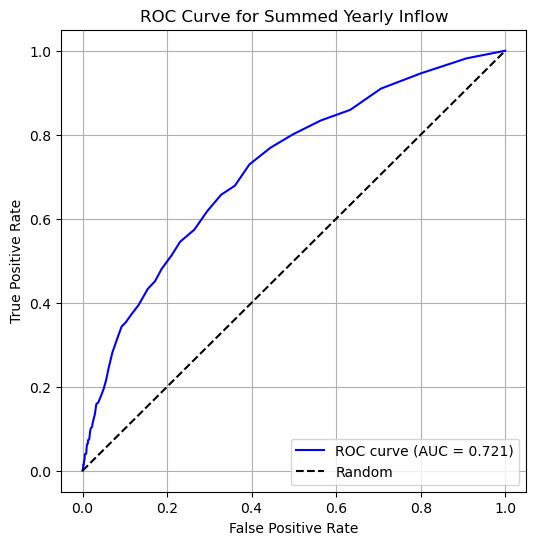

In [28]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='blue')
plt.plot([0,1], [0,1], 'k--', label='Random')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Summed Yearly Inflow')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [67]:
# all features
# If higher inflow means lower delinquency, invert the feature
df_eval = df_eval.dropna(subset=['DQ_TARGET'])
features = df_eval[['avg_yearly_inflow', 'std_inflow', 'trend', 'num_transactions', 'sum_groceries_9m', 'sum_dining_6m',\
                   'pct_spend_gambling', 'pct_spend_essentials', 'delta_groceries_3m', 'pct_spend_utilities',\
                   'has_overdraft_6m']]
y_true = df_eval['DQ_TARGET']

# Train the model:
X_train, X_test, y_train, y_test = train_test_split(features, y_true, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_score = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)
print(f"Random Forest AUC: {auc:.3f}")

# Also check feature importance:
feature_names = ['avg_yearly_inflow', 'std_inflow', 'trend', 'num_transactions', 'sum_groceries_9m', 'sum_dining_6m',\
                'pct_spend_gambling','pct_spend_essentials', 'delta_groceries_3m', 'pct_spend_utilities',\
                'has_overdraft_6m']
importances = rf.feature_importances_
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")

Random Forest AUC: 0.730
avg_yearly_inflow: 0.131
std_inflow: 0.109
trend: 0.105
num_transactions: 0.056
sum_groceries_9m: 0.107
sum_dining_6m: 0.113
pct_spend_gambling: 0.027
pct_spend_essentials: 0.121
delta_groceries_3m: 0.110
pct_spend_utilities: 0.107
has_overdraft_6m: 0.015
